1. Alex
2. Dal Cin
3. 1088357
4. QFI
5. alex.dalcin@edu.unito.it

In [1690]:
import pandas as pd
import numpy as np

## 0. Data Cleaning.

I am going to divide this procedure in two sides.
1. sales
2. market

Each of them will be checked column by column in order to see if it respects the requested conditions.

In [1691]:

sales=pd.read_csv("sales.csv")
#1.
print(sales.head(5)) #check the first 5 data, to see if there is something strange in our dataset. Actually, there is a column of NaN.
sales.columns #as we can see, there is a column (the 5th one, which is unnamed; " " to be precise)
print("Values in the void column:")
print(sales[" "].unique()) #by doing this we check the values in that column. As we can see the only output is [nan], 
#which means that there are only null values. So we can drop it.
sales=sales.drop([" "],axis=1)
sales.columns #now we have 4 columns. We can check the number by doing shape[1]


  market_id        date is_open  sales_amount    
0      XC14  31/12/2022     YES      55727.34 NaN
1      WG25  31/12/2022     YES      12984.10 NaN
2      UX72  31/12/2022     YES      13046.56 NaN
3      EE84  31/12/2022     YES      60916.76 NaN
4      RF54  31/12/2022     YES      12376.42 NaN
Values in the void column:
[nan]


Index(['market_id', 'date', 'is_open', 'sales_amount'], dtype='object')

In [1692]:
#2.
#   check for null values
print(sales.isnull().sum())
sales=sales[["market_id", "date", "is_open", "sales_amount"]].copy()

market_id        1
date             1
is_open          1
sales_amount    15
dtype: int64


In [1693]:
#   check the datatype. "date" should be converted to Date, as requested. The others will remain the same, because it is not asked to convert the type.
# If we still want to do it, for instance if we want to convert into int or string, we can use astype(" name of the datatype").
print(sales.dtypes)

market_id        object
date             object
is_open          object
sales_amount    float64
dtype: object


In [1694]:
#   let's convert date of sales into a datetime, where the format will be DD/MM/YYYY, as given
sales["date"] = pd.to_datetime(sales["date"], format="%d/%m/%Y")
#   just to be sure, let's make a test to check if it is actually written in the correct format
print(sales["date"].head(1).dt.month)

#dates should range from 01/01/2021 to 31/12/2023
minDate=min(sales["date"])
maxDate=max(sales["date"])
print(f"min is {minDate} and max is {maxDate}") #which is correct

0    12
Name: date, dtype: int32


min is 2021-01-01 00:00:00 and max is 2022-12-31 00:00:00


In [1695]:
# let's check is_open

#   Let's check the values of is_open; they should be either YES or NO
print(sales["is_open"].unique()) #values should be only YES or NO
#as we can see, values like YESS are most likely typos, so I am going to assume that they are actually YES. Let's change them
print(sales[sales["is_open"]=="YESS"]) #there is actually only one
sales["is_open"]=sales["is_open"].replace("YESS","YES")
print(sales["is_open"].unique())

print(sales[sales["is_open"].isnull()]) #there is actually only one, the row doesn't say anything, so let's drop it.
sales=sales.drop(sales[sales["is_open"].isnull()].index)
#Could have add values that are average or values that happen the most.
print(sales["is_open"].unique()) #Now we have only 2 values: YES or NO

#There is also the condition of NO-->sales_amount=0, but we will check it later.

['YES' 'NO' 'YESS' nan]
      market_id       date is_open  sales_amount
49154      BT51 2022-10-14    YESS      25220.48
['YES' 'NO' nan]
       market_id date is_open  sales_amount
477294       NaN  NaT     NaN           NaN
['YES' 'NO']


In [1696]:
#   Now, let's check the sales_amount

#   First of all, data type is correct, it is requested a float value and we have, indeed, a float value.

#   Now, let's check the condition >= 0
print((sales["sales_amount"]< 0).sum()) #there are 6 values that are < 0, let's see them.
print(sales[sales["sales_amount"]<0]) #they are all -999999, so there might have been an error with the registration of sales_amount.
#   Instead of dropping them, let's replace them with the mean value.
mean_age = sales['sales_amount'].mean()
sales["sales_amount"]=sales["sales_amount"].replace(-999999,mean_age)
print((sales["sales_amount"]< 0).sum()) #now it is correct.
#   Furthermore, if IS_OPEN=NO -->sales_amount has to be 0
print(sales[(sales["is_open"]=="NO") & (sales["sales_amount"]>0)]) #There is one row, let's change the value of sales_amount to 0.
sales["sales_amount"]=sales["sales_amount"].replace(9999999,0)
print(sales[(sales["is_open"]=="NO") & (sales["sales_amount"]>0)]) #Let's check, just to see if it is correct.

6
      market_id       date is_open  sales_amount
47528      XC14 2022-10-16     YES     -999999.0
48150      XC14 2022-10-15     YES     -999999.0
48772      XC14 2022-10-14     YES     -999999.0
49394      XC14 2022-10-13     YES     -999999.0
50016      XC14 2022-10-12     YES     -999999.0
50638      XC14 2022-10-11     YES     -999999.0
0
    market_id       date is_open  sales_amount
753      EE84 2022-12-30      NO     9999999.0
Empty DataFrame
Columns: [market_id, date, is_open, sales_amount]
Index: []


In [1697]:
#Now, let's move to the market data.
market=pd.read_csv("market.csv")
print(market.head(5)) #we noticed, again, an Unnamed column ["Unnamed: 2"]. Again, follow the same procedure of before.
print(market.columns)
print(market["Unnamed: 2"].unique()) #again, only [nan] values
market=market.drop(["Unnamed: 2"], axis=1)
sales.columns #now we have 4 columns. We can check the number by doing shape[1]


     id country  Unnamed: 2 market_type  square_feet  avg_customers  \
0  XC14   SPAIN         NaN       HYPER        11135          773.0   
1  WG25  FRANCE         NaN        MINI         1402          252.0   
2  UX72  FRANCE         NaN        MINI         1452          265.0   
3  EE84   SPAIN         NaN       HYPER        15259          874.0   
4  RF54  FRANCE         NaN        MINI         2497          191.0   

   competitor_distance has_promotions  
0                  515            YES  
1                  522            YES  
2                15939            YES  
3                  754            YES  
4                34007            YES  
Index(['id', 'country', 'Unnamed: 2', 'market_type', 'square_feet',
       'avg_customers', 'competitor_distance', 'has_promotions'],
      dtype='object')
[nan]


Index(['market_id', 'date', 'is_open', 'sales_amount'], dtype='object')

In [1698]:
#2.
#   check for null values
print(market.isnull().sum())
market=market[["id","country","market_type","square_feet","avg_customers","competitor_distance","has_promotions"]].copy()

id                     0
country                0
market_type            2
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64


In [1699]:
market.dtypes #Let's check the datatypes. Again, we keep data as object because it is not requested to convert them. Anyway, if you still want to do it,
#The function to use is astype()

id                      object
country                 object
market_type             object
square_feet              int64
avg_customers          float64
competitor_distance      int64
has_promotions          object
dtype: object

In [1700]:
print(market["id"].isnull().sum()) #there are not problematic values

0


In [1701]:
print(market["country"].unique()) # SPAIN, FRANCE, ITALY, that's what we want, there are no missing values, so we won't check.

['SPAIN' 'FRANCE' 'ITALY']


In [1702]:
#   check datatype in order to detect data that are of a type that is different from the given one
print(market["market_type"].unique()) #there is a "nan" value
print(market["market_type"].isnull().sum()) #they are actually two, let's find out which are the rows.
print(market[market["market_type"].isnull()]) #there are two values with nan values, instead of drop them, let's replace them with the value that appears the most.
embarked_counts = market['market_type'].value_counts()
mode_embarked = embarked_counts.idxmax()
market['market_type'].fillna(mode_embarked, inplace=True)
print(market["market_type"].unique()) #Now that's correct

['HYPER' 'MINI' 'SUPER' nan]
2
       id country market_type  square_feet  avg_customers  \
90   RU30   SPAIN         NaN        14305          637.0   
225  KB10   ITALY         NaN         1520          150.0   

     competitor_distance has_promotions  
90                  1701            YES  
225                  479            YES  
['HYPER' 'MINI' 'SUPER']


In [1703]:
print(market["square_feet"].isnull().sum())# square_feet has no null values. Also, it is in the correct type, so we don't need to modify anything.

0


In [1704]:
#avg_customers actually has 1 null values, let's find out in which row.
print(market[market["avg_customers"].isnull()]) #this is the row. Let's drop it.
mean_age2 = market["avg_customers"].mean()
market["avg_customers"].fillna(mean_age2, inplace=True)
print(market["avg_customers"].isnull().sum()) #Now that's correct

print(market[market["avg_customers"]<0]) #there is one value that is <0, therefore that's not integer
market["avg_customers"]=market["avg_customers"].replace(-9999,mean_age2)
print(market[market["avg_customers"]<0]) #Lets's check it, just to be sure.

       id country market_type  square_feet  avg_customers  \
626  OD40   ITALY       HYPER        14157            NaN   

     competitor_distance has_promotions  
626                 3519            YES  
0
      id country market_type  square_feet  avg_customers  competitor_distance  \
69  IP89   SPAIN       HYPER        15560        -9999.0                 6281   

   has_promotions  
69            YES  
Empty DataFrame
Columns: [id, country, market_type, square_feet, avg_customers, competitor_distance, has_promotions]
Index: []


In [1705]:
#competitor_distance has no null value. Let's check <0 values
print(market[market["competitor_distance"]<0]) #no <0 values.

Empty DataFrame
Columns: [id, country, market_type, square_feet, avg_customers, competitor_distance, has_promotions]
Index: []


In [1706]:
print(market["has_promotions"].unique()) #YES and NO, they are the kind of data that we want, so we are not going to check for any missing value.

['YES' 'NO']


In [1707]:
print(sales)

       market_id       date is_open  sales_amount
0           XC14 2022-12-31     YES      55727.34
1           WG25 2022-12-31     YES      12984.10
2           UX72 2022-12-31     YES      13046.56
3           EE84 2022-12-31     YES      60916.76
4           RF54 2022-12-31     YES      12376.42
...          ...        ...     ...           ...
523944      ZM74 2021-01-01     YES      21553.84
523945      WW60 2021-01-01     YES      56371.18
523946      LU14 2021-01-01     YES      24107.19
523947      HY57 2021-01-01     YES      12257.38
523948      QD17 2021-01-01     YES      28068.53

[523948 rows x 4 columns]


In [1708]:
print(market)

       id country market_type  square_feet  avg_customers  \
0    XC14   SPAIN       HYPER        11135          773.0   
1    WG25  FRANCE        MINI         1402          252.0   
2    UX72  FRANCE        MINI         1452          265.0   
3    EE84   SPAIN       HYPER        15259          874.0   
4    RF54  FRANCE        MINI         2497          191.0   
..    ...     ...         ...          ...            ...   
745  ZM74   ITALY       SUPER         5778          356.0   
746  WW60  FRANCE       HYPER        10923          907.0   
747  LU14   ITALY       SUPER         5742          397.0   
748  HY57   ITALY        MINI         2495          228.0   
749  QD17  FRANCE       SUPER         6806          516.0   

     competitor_distance has_promotions  
0                    515            YES  
1                    522            YES  
2                  15939            YES  
3                    754            YES  
4                  34007            YES  
..             

# Now, let's move on to our program by doing the first point.
The target is sales_amount.

In [1709]:
#   First of all, let's start by collapsing the temporal data. We will work on sales cumulated in the horizontal line of 2 years.
sales = sales.drop(["date"], axis=1)
print(sales)    #New dataset without dates.


       market_id is_open  sales_amount
0           XC14     YES      55727.34
1           WG25     YES      12984.10
2           UX72     YES      13046.56
3           EE84     YES      60916.76
4           RF54     YES      12376.42
...          ...     ...           ...
523944      ZM74     YES      21553.84
523945      WW60     YES      56371.18
523946      LU14     YES      24107.19
523947      HY57     YES      12257.38
523948      QD17     YES      28068.53

[523948 rows x 3 columns]


In [1710]:
sales=sales.groupby(["market_id"])["sales_amount"].sum() #We will group the sales by the market_id, so the sales_amount with the same id will be cumulated
#into one sales_amount that will correspond to one id

In [1711]:
#   Now, let's merged sales and market. 
market=market.rename(columns={"id":"market_id"})
merged_df= pd.merge(market,sales,on="market_id",how="left")
print(merged_df)

    market_id country market_type  square_feet  avg_customers  \
0        XC14   SPAIN       HYPER        11135          773.0   
1        WG25  FRANCE        MINI         1402          252.0   
2        UX72  FRANCE        MINI         1452          265.0   
3        EE84   SPAIN       HYPER        15259          874.0   
4        RF54  FRANCE        MINI         2497          191.0   
..        ...     ...         ...          ...            ...   
745      ZM74   ITALY       SUPER         5778          356.0   
746      WW60  FRANCE       HYPER        10923          907.0   
747      LU14   ITALY       SUPER         5742          397.0   
748      HY57   ITALY        MINI         2495          228.0   
749      QD17  FRANCE       SUPER         6806          516.0   

     competitor_distance has_promotions  sales_amount  
0                    515            YES  3.647356e+07  
1                    522            YES  7.605641e+06  
2                  15939            YES  7.446894e+

In [1712]:
print(merged_df.isnull().sum()) #   we don't have null data, as a consequence, from this point of view, we can't exclude any values.
#   In any case, market_id won't be used as a predictor because it is just an identifier and doesn't really tell anything about sales_amount.


market_id              0
country                0
market_type            0
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
sales_amount           0
dtype: int64


Before coding, let's talk about our possible predictors, in order to check if there might be a logical relation between them and the target (sales_amount).
- country: The country might be relevant in order to see where to open in order to maximize the sales, so a country might give more sales than another because, maybe, the product better fits the needs of the people of that particular country.
- market_type: Also market_type, we want to see if a SUPER or a MINI makes more or less sales. Maybe some of them might make more sales the other, so, knowing how much might change the sales_amount by varying it, might be useful.
- square_feet: Seeing if the area of the market is relevant and how much (for instance,if i increase of 1 meter, how much will my sales increase?), i suppose that as square_feet increases, also sales_amount will increase.
- avg_customers: How much customers we have daily can really have an impact (more customers-->more sales in general, but we want to know also the magnitude of it).
- competitor_distance: It can have a huge impact, competitors steal customers, so the sales will decrease (might have a negative coefficient: as competitors are more distant, the less the sales. Or maybe not, for instance, more competitors might also mean a center with a lot of shops, so it increases the sales).
- has_promotions: If the market has promotions or not might be useful to discover its impact on sales, in order to decide how much we should promote to maximize the sales. I suppose it has a positive relation, the more you promote, the higher will be the sales.

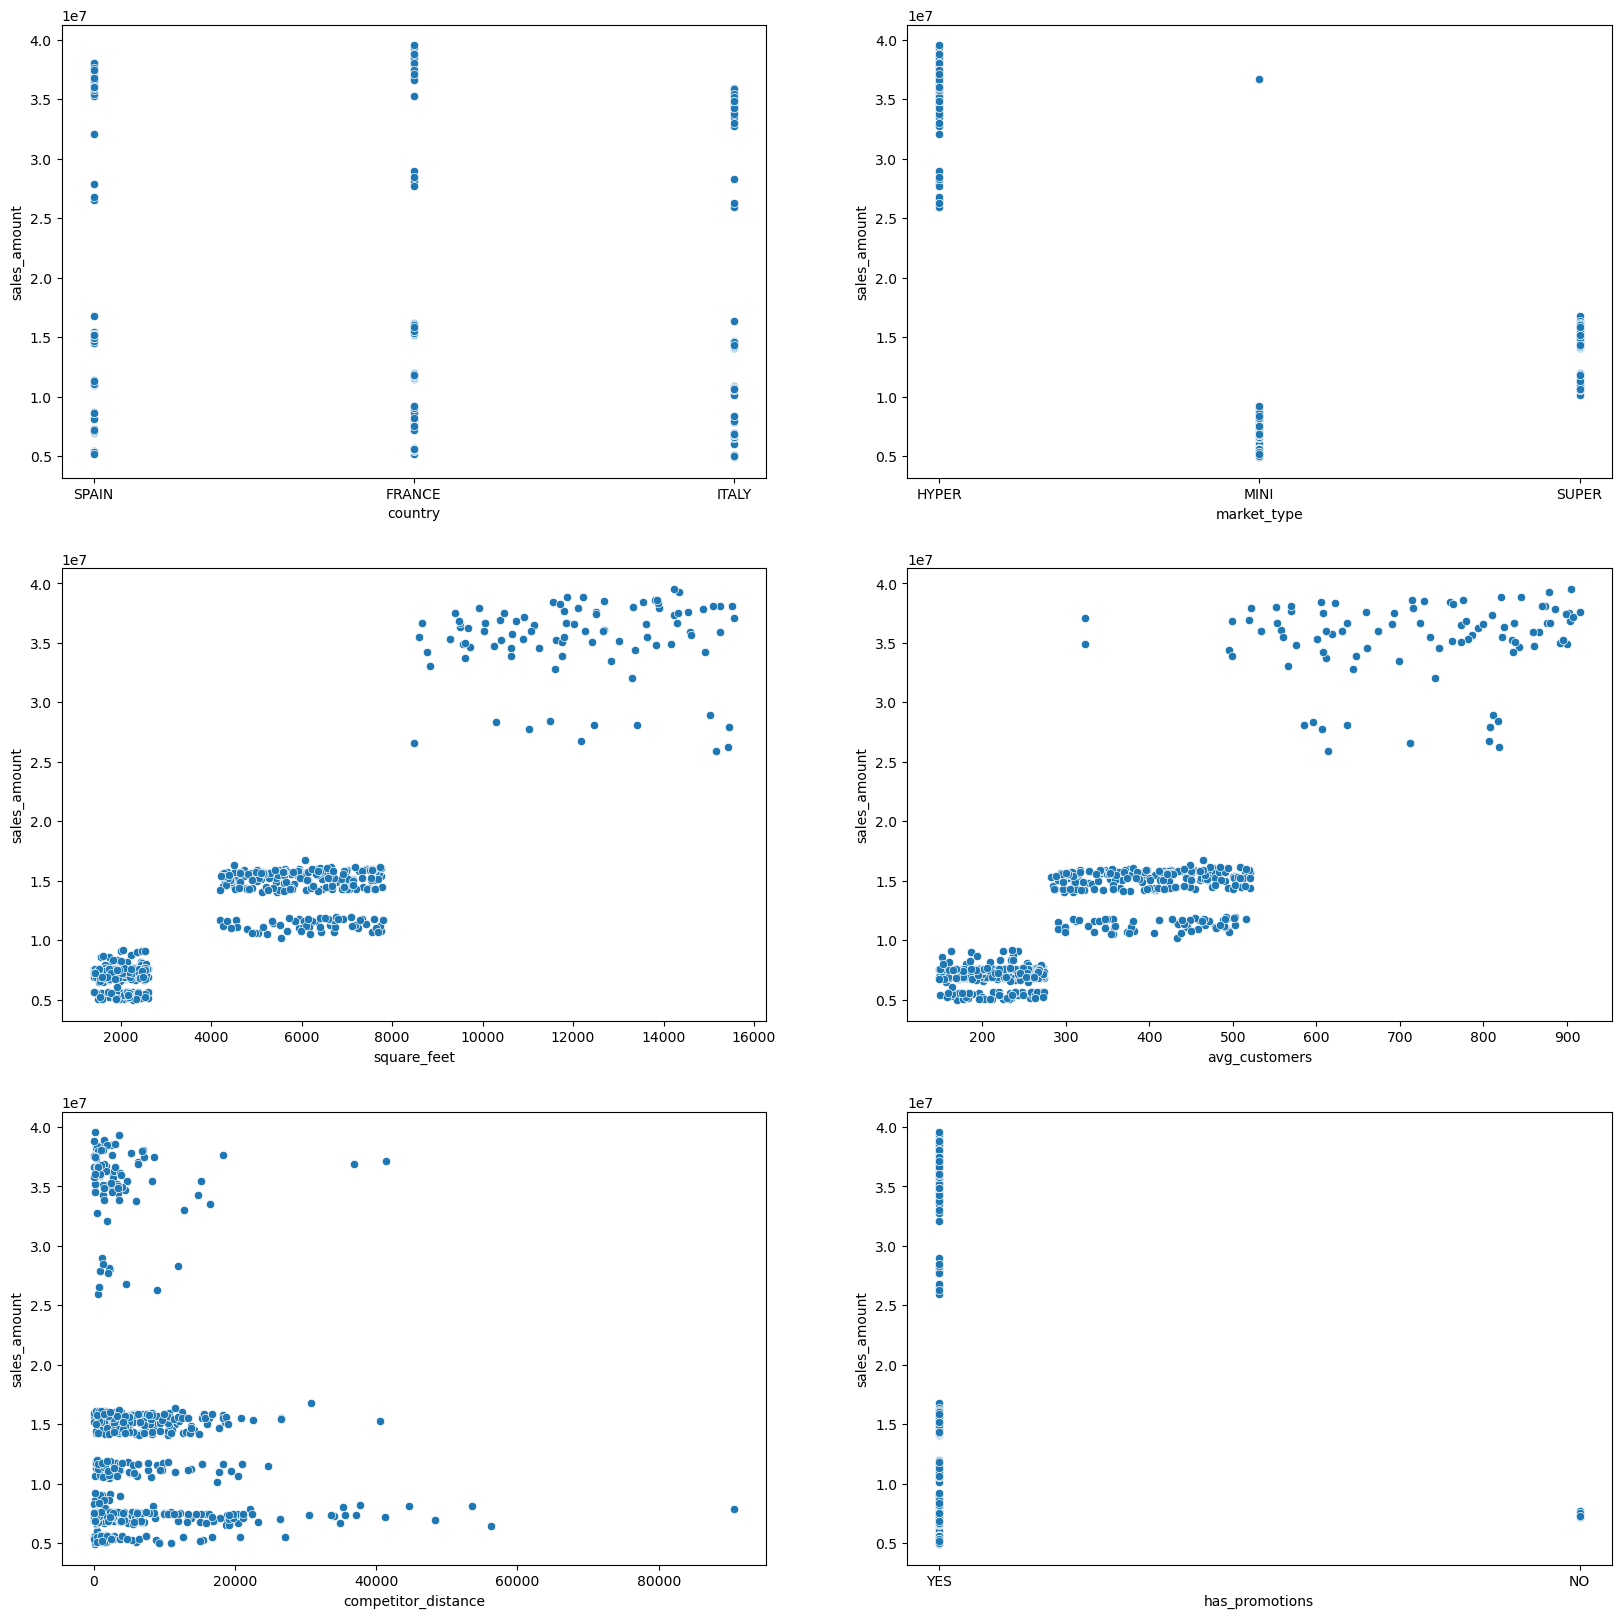

In [1713]:
import matplotlib.pyplot as plt
import seaborn as sns

interesting_columns = ["country", "market_type", "square_feet", "avg_customers", "competitor_distance", "has_promotions"]
#let's scatterplot the point

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
index = 0
ax = ax.flatten()
for col in interesting_columns:
    sns.scatterplot(x=col, y="sales_amount", data=merged_df, ax=ax[index])
    index += 1

In [1714]:
#   First of all. Let's summarize our data, just to get a general picture of our data.
merged_df.describe()
#   We have sales_amount, which will be our target (the number that we want to maximize) and other 3 predictors. 
#   They are only because in this moment we are talking about quantitative predictors, as a consequence Qualitative ones will be modelled then.

,square_feet,avg_customers,competitor_distance,sales_amount
count,750.000000,750.000000,750.000000,7.500000e+02
mean,4596.989333,337.043414,5485.224000,1.294361e+07
std,3495.020978,180.851646,8223.619175,9.134337e+06
min,1400.000000,148.000000,0.000000,4.935078e+06
25%,1974.250000,204.000000,773.000000,7.236034e+06
50%,2513.500000,264.000000,2348.000000,7.640360e+06
75%,6438.750000,432.000000,6807.750000,1.537533e+07
max,15560.000000,915.000000,90659.000000,3.955870e+07


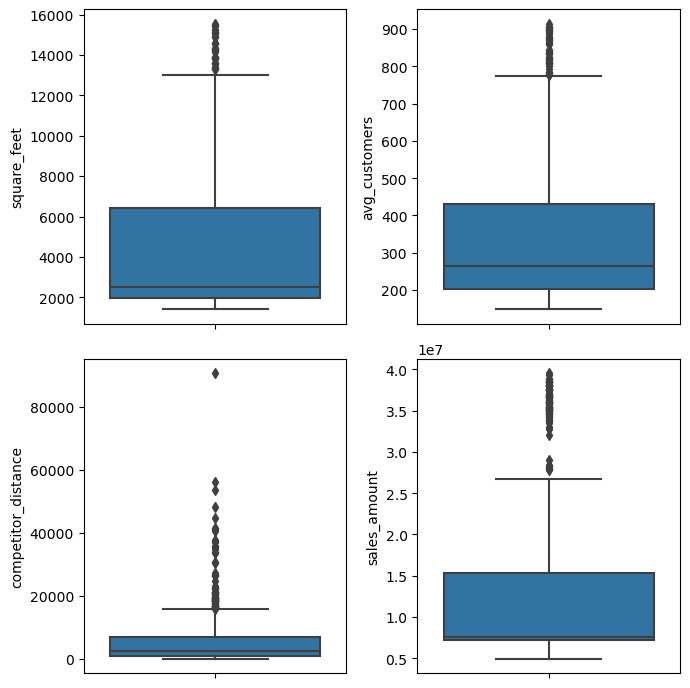

In [1715]:
#   To better visualize it, let's see a boxplot
#Before seeing the box plot, let's select the 4 quantitative variables (3 predictors + 1 target)
merged_quant=merged_df[["square_feet","avg_customers","competitor_distance","sales_amount"]].copy()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))
index = 0
ax = ax.flatten()
for k, v in merged_quant.items():
    sns.boxplot(y=k, data=merged_quant, ax=ax[index])
    index +=1
plt.tight_layout()

In [1716]:
#   From this picture we can't really say a lot, because the number of rows that we have is quite huge.
#   Let's just say that there are outliers, but to have a better view, we should quantify it.
#   Why? Because, as i have already said, the number of rows is is quite high and having some outliers is normal.
for k, v in merged_quant.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}% outliers")

The column square_feet has 4.27% outliers
The column avg_customers has 5.2% outliers
The column competitor_distance has 8.8% outliers
The column sales_amount has 11.73% outliers


In [1717]:
#   Now that we have talked about quantitative variables, let's move to the qualitative ones.
#   When we apply linear regression method, if we do it with qualitative ones will create some problems (EXPLAIN BETTER)
#   As a consequence, let's encode them as number. Our column of interests will be country, market_type and has_promotions (the string ones, market_id is just an identifier)
merged_df["country"] = merged_df["country"].map({"SPAIN": 0, "FRANCE": 1, "ITALY": 2})
merged_df["market_type"] = merged_df["market_type"].map({"MINI": 0, "SUPER": 1, "HYPER": 2})
merged_df["has_promotions"] = merged_df["has_promotions"].map({"YES": 0, "NO": 1})

In [1718]:
#   Just to be sure, let's check that everything is okay. The output should be made only of numbers.
print(merged_df["country"].unique())
print(merged_df["market_type"].unique())
print(merged_df["has_promotions"].unique())


[0 1 2]
[2 0 1]
[0 1]


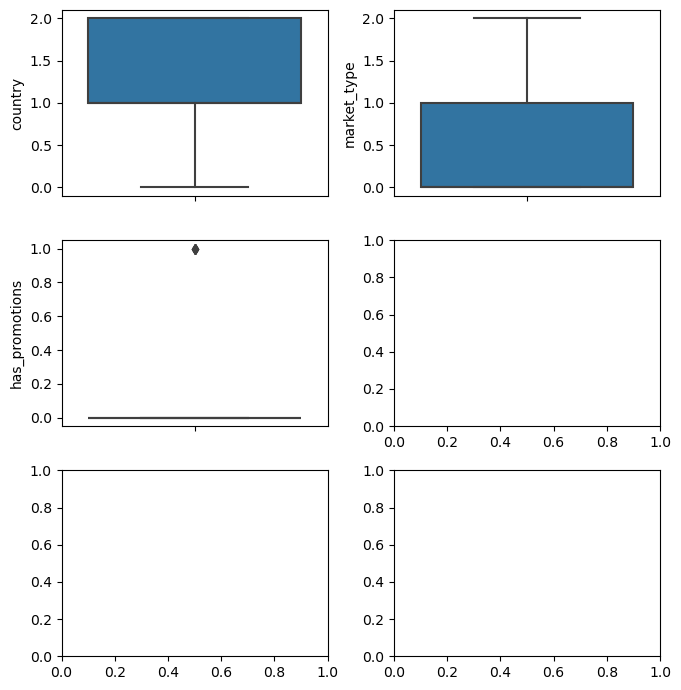

In [1719]:
merged_qual=merged_df[["country","market_type","has_promotions"]].copy()
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(7, 7))
index = 0
ax = ax.flatten()
for k, v in merged_qual.items():
    sns.boxplot(y=k, data=merged_qual, ax=ax[index])
    index +=1
plt.tight_layout()

In [1720]:
#   From this picture we can't really say a lot, because the number of rows that we have is quite huge.
#   Let's just say that there are outliers, but to have a better view, we should quantify it.
#   Why? Because, as i have already said, the number of rows is is quite high and having some outliers is normal.
#   It is more useful with quantitative, but let's do it
for k, v in merged_qual.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}% outliers")

The column country has 0.0% outliers
The column market_type has 0.0% outliers
The column has_promotions has 100.0% outliers


Now, let's perform a linear regression, we are going to assume a linear relationship between our predictors and our target.
By looking at our target, we can see that it is a float variable (quantitative, not qualitative), therefore we can apply a linear regression.
Otherwise, if our target would have been Qualitative (country for example), after performing categorization of those variables, we would have performed a logistic regression. 

In [1721]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [1722]:
X=merged_df[["square_feet","avg_customers","competitor_distance","country","market_type","has_promotions"]]
y=merged_df["sales_amount"]

Before going on, we notice that X is made of multiple predictors. When we deal with linear regression we need to choose which kind of linear regression we want to perform:
- Simple linear regression
- Multiple linear regression

Anyway, Multiple linear regression works better than Simple linear regression when we deal with multiple coefficients. Let's start by performing a Multiple linear regression.

In [1723]:
# split between X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

# Add a constant for the intercept to both training and test data
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# Fit the linear regression model
model = sm.OLS(y_train, X_train_with_intercept).fit()

In [1724]:
# coefficient estimates 
coefficients = model.params
print(coefficients)

const                  1.823777e+06
square_feet            9.615477e+02
avg_customers          1.357350e+04
competitor_distance   -2.378187e+01
country               -1.580939e+05
market_type            4.040580e+06
has_promotions         4.338046e+05
dtype: float64


This is a linear regression applied to all our predictors. So, as we can see that an increase of 1 in one of those predictors leads to an increase of *coefficients* to our target (sales_amount).
By the way, are all those predictors useful? Let's make some feature selection, in order to discover if we can actually cut out some of them. This can lead to a more simple, but still as descriptive as the former one ( so, more powerful). If we actually need to reduce the number of our predictors, also the coefficients will change. So, the results that we have found are helpful, but not still definitive.
- const                  1.823777e+06
- square_feet            9.615477e+02
- avg_customers          1.357350e+04
- competitor_distance   -2.378187e+01
- country               -1.580939e+05
- market_type            4.040580e+06
- has_promotions         4.338046e+05

So, for instance, one increase in avg_customers will lead to an increase on sales_amount of 1.357350e+04; on the other hand, an increase of 1 on competitor_distance, will lead to a decrease of-2.378187e+01. "consts" is B_0, so, if all the others are 0, sales_amount will be equal to 1.823777e+06.

Before doing model selection, let's conclude our linear regression.

In [1725]:
def calculate_metrics(y_validation, y_pred, X):
    residuals = y_validation - y_pred
    RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5
    R2 = 1 - (residuals ** 2).sum() / ((y_validation - y_validation.mean()) ** 2).sum()
    MSE = (residuals ** 2).mean()
    return RSE, R2, MSE

#   This is just a function to calculate our metrics: RSE, R^2, MSE

- RSE: measures the average deviation of the observed values from the predicted values by the regression model
- R^2: from 0 to 1; the higher, the better. Proportion of the variance in the dependent variable that is predictable from the independent variables
- MSE: we would like to select the model for which the test MSE is as small as possible (the test MSE can be computed through cross validation, whereas training MSE is easier to get)

They will help us understanding how well our model fits the data and how they accurately predict.

In [1726]:
# model accuracy

y_pred = model.predict(X_test_with_intercept)

# RSE
residuals = y_pred - y_test
RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5

# R2
R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# MSE
MSE = ((y_test - y_pred) ** 2).mean()

print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

The RSE is 3151552.79, the R2 is 0.92 and the MSE is 9468778376500.49


OUTPUT: 
- The RSE is 3151552.79, 
- The R2 is 0.92,
- The MSE is 9468778376500.49

In [1727]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
vif

,VIF Factor,Feature
0,25.690802,square_feet
1,14.430745,avg_customers
2,1.383094,competitor_distance
3,2.650869,country
4,13.628929,market_type
5,1.012276,has_promotions


There is some correlation (some of them are higher than 1), so that some variables might be removed or merged into one. It might be the case or not, anyway, let's see.

**Feature selection.**

Are all the predictors useful? Having a lot of predictors might be useful, but could lead to a more complex and redundant model, that will be overfitted.\
As a consequence, Feature selection helps finding the most important predictors, in order to eliminate the ones that don't carry so much information. This will lead to a more simple model that will perform better.

In [1728]:

import itertools
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Step 1: initialize KFold object to use for model evaluation
number_folds = 4
kf = KFold(n_splits=number_folds, shuffle=True, random_state=999)

# Step 4: Implement best subset selection
def best_subset_selection(X, y, target_col):
    n_features = X.shape[1]
    all_models = []
    best_models = []
    best_metrics = {
        "RSE": float("inf"),
        "R2": -float("inf"),
        "MSE": float("inf"),
    }

    # for each number of features
    for k in range(1, n_features + 1):
        print(f"start iteration {k} of {n_features}")
        # for each combination of k number of features
        for combo in itertools.combinations(X.columns, k):
            model_features = list(combo)
            X_subset = X[model_features]
            # Add a constant for the intercept term
            X_subset = sm.add_constant(X_subset)  
            # initialize empty array to store mse for each fold
            mse_folds = []
            # for each fold fit the model
            for train_idx, validation_idx in kf.split(X_subset):
                X_train, X_validation = X_subset.iloc[train_idx], X_subset.iloc[validation_idx]
                y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
                model = sm.OLS(y_train, X_train).fit()
                y_pred = model.predict(X_validation)
                RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X[model_features])
                mse_folds.append(MSE)
            # estimate test error using the mean of MSE in all folds
            test_error_estimated = sum(mse_folds) / len(mse_folds)
            # if the estimation of the test error is reduced, save metrics and model
            if test_error_estimated < best_metrics["MSE"]:
                best_metrics["RSE"] = RSE
                best_metrics["R2"] = R2
                best_metrics["MSE"] = test_error_estimated
                best_models = model_features
            # save number of features and estimated test error for plotting
            all_models.append([len(list(combo)), test_error_estimated])

    return best_models, best_metrics, all_models

# Step 5: Calculate and display statistics for each model
best_features, best_metrics, all_models = best_subset_selection(X, y, 'sales_amount')

print("-------------------")
print("Finished!")
print("Features with best model:", best_features)
print("RSE:", best_metrics["RSE"])
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])

start iteration 1 of 6
start iteration 2 of 6
start iteration 3 of 6


start iteration 4 of 6
start iteration 5 of 6
start iteration 6 of 6
-------------------
Finished!
Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'market_type', 'has_promotions']
RSE: 2831373.082830221
R2: 0.8688794352592979
MSE: 9484989328712.307


OUTPUT:
- RSE: 2831373.082830221
- R2:  0.8688794352592979
- MSE: 9484989328712.307 > 9468778376500.49 .

Sometimes, MSE might be higher because, indeed, the previous model underestimated the Test error. Anyway, it can also be smaller. By doing this procedure we eliminate (or reduce) the amount of luck in the choice. By doing this we split our dataset into 4 (K should be, but in this case is 4), is trained in 3 of them and validated on the remaining one.

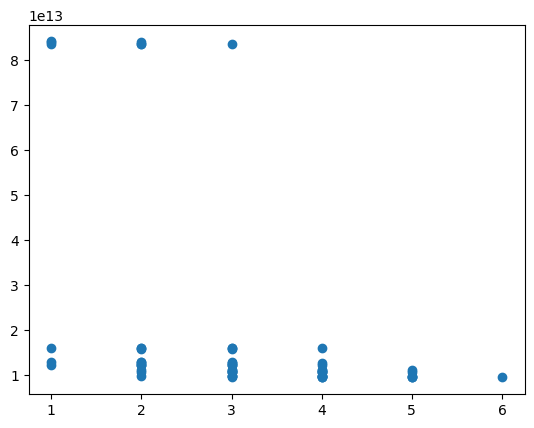

In [1729]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

If we want to make predictions, k high such as at least 4 or 5 will lead to a better result because data that are plugged in into the folds are more diversified. On the other hand, if we want to make inference, it is better a k small because provides more data in each fold.

Let's apply to see our result to see if we can make an improvement by taking the linear combinations.
Let's start by stantardize our data.

In [1730]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np

# filter data based on best_features
best_features=['square_feet', 'avg_customers', 'competitor_distance', 'market_type', 'has_promotions']
X_subset = X[best_features]

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)
X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)
# check if features have been standardized
for col in X_scaled.columns:
    print(f"The column {col} has mean {round(X_scaled[col].mean(), 2)} and variance {round(X_scaled[col].var(), 2)}")

The column square_feet has mean 0.0 and variance 1.0
The column avg_customers has mean -0.0 and variance 1.0
The column competitor_distance has mean -0.0 and variance 1.0
The column market_type has mean -0.0 and variance 1.0
The column has_promotions has mean -0.0 and variance 1.0


**Ridge Regression**

With Ridge Regression we are going to apply a penalty term, which is made of:
- a tuning parameter (lambda),as lambda increases, also the flexibility of the ridge regression decreases (variance goes down but bias goes up)
- squared coefficients,

Text(0, 9485937827645.178, 'Best OLS estimation')

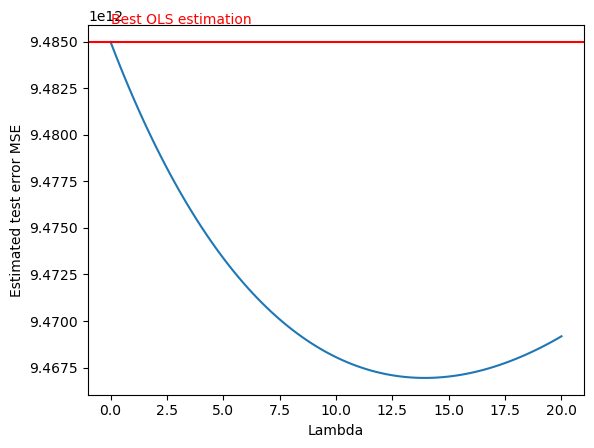

In [1731]:
# save test error and lambda values
results_ridge = []
best_lmbd_ridge = {"MSE": float("inf"), "lmbd": float("inf")}

# iterate over different values of lambda
for lmbd in np.linspace(0.0001, 20, 100):
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        model = Ridge(alpha=lmbd).fit(X_train, y_train)
        y_pred = model.predict(X_validation)
        RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_ridge.append([test_error_estimated, lmbd])
    # check if model improved
    if test_error_estimated < best_lmbd_ridge["MSE"]:
        best_lmbd_ridge["MSE"] = test_error_estimated
        best_lmbd_ridge["lmbd"] = lmbd

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_ridge], [elem[0] for elem in results_ridge])
plt.xlabel("Lambda")
plt.ylabel("Estimated test error MSE")
plt.axhline(best_metrics["MSE"], color="red")
plt.text(0, best_metrics["MSE"] * 1.0001, "Best OLS estimation", color="red") # * 1.0001 is used to place the text a bit above best_metrics["MSE"]

In [1732]:
# compare min using Ridge and OLS
min_ridge_test_error_estimated = min([elem[0] for elem in results_ridge])

print(f"Using OLS, the best model has an estimated test MSE of {round(best_metrics['MSE'], 2)}")
print(f"Using Ridge, the best model has an estimated test MSE of {round(min_ridge_test_error_estimated, 2)} using a value of lambda = {round(best_lmbd_ridge['lmbd'], 2)}")

Using OLS, the best model has an estimated test MSE of 9484989328712.31
Using Ridge, the best model has an estimated test MSE of 9466943737953.09 using a value of lambda = 13.94


**Lasso**

With Lasso, instead, we apply a different penalty term:
- We still have the tuning parameter(lambda)
- The coefficients will be under absolute value, not squared --> this will allow us to touch the axis, a thing that with ridge regression we can't do

Text(0, 9467890432326.883, 'Best Ridge estimation')

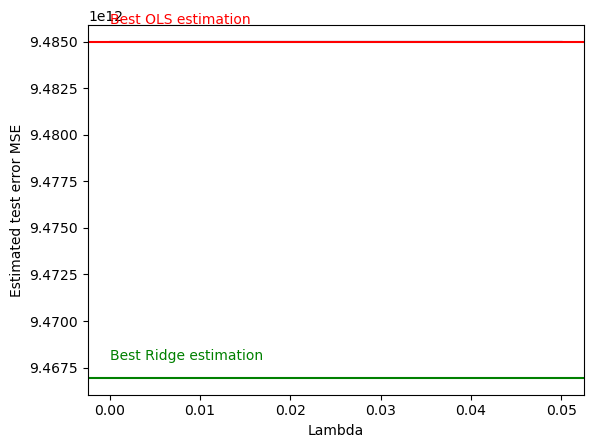

In [1733]:
# let's now run Lasso instead of Ridge
from sklearn.linear_model import Lasso


# save test error and lambda values
results_lasso = []
best_lmbd_lasso = {"MSE": float("inf"), "lmbd": float("inf")}

# iterate over different values of lambda
for lmbd in np.linspace(0.0001, 0.05, 100):
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        model = Lasso(alpha=lmbd).fit(X_train, y_train)
        y_pred = model.predict(X_validation)
        RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_lasso.append([test_error_estimated, lmbd])
    # check if model improved
    if test_error_estimated < best_lmbd_lasso["MSE"]:
        best_lmbd_lasso["MSE"] = test_error_estimated
        best_lmbd_lasso["lmbd"] = lmbd

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_lasso], [elem[0] for elem in results_lasso])
plt.xlabel("Lambda")
plt.ylabel("Estimated test error MSE")
plt.axhline(best_metrics["MSE"], color="red")
plt.text(0, best_metrics["MSE"] * 1.0001, "Best OLS estimation", color="red") # * 1.0001 is used to place the text a bit above best_metrics["MSE"]
plt.axhline(min_ridge_test_error_estimated, color="green")
plt.text(0, min_ridge_test_error_estimated * 1.0001, "Best Ridge estimation", color="green") # * 1.0001 is used to place the text a bit above best_metrics["MSE"]

In [1734]:
# compare min using Lasso, Ridge and OLS
min_lasso_test_error_estimated = min([elem[0] for elem in results_lasso])

print(f"Using OLS, the best model has an estimated test MSE of {round(best_metrics['MSE'], 2)}")
print(f"Using Ridge, the best model has an estimated test MSE of {round(min_ridge_test_error_estimated, 2)} using a value of lambda = {round(best_lmbd_ridge['lmbd'], 2)}")
print(f"Using Lasso, the best model has an estimated test MSE of {round(min_lasso_test_error_estimated, 2)} using a value of lambda = {round(best_lmbd_lasso['lmbd'], 2)}")

Using OLS, the best model has an estimated test MSE of 9484989328712.31
Using Ridge, the best model has an estimated test MSE of 9466943737953.09 using a value of lambda = 13.94
Using Lasso, the best model has an estimated test MSE of 9484989251225.94 using a value of lambda = 0.05


Principal component analysis is a method borrowed from unsupervised learning. It helps simplifying our model by reducing dimensionality. PCR might help mitigating overfitting, and it is not a feature selection method.

Text(0, 0.5, 'Estimated test error MSE')

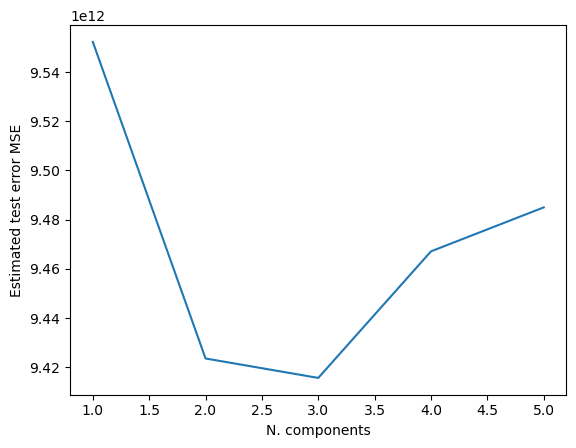

In [1735]:
# let's start from PCA (Principal component analysis)
from sklearn.decomposition import PCA

# save test error and n_components
results_pca = []
best_components_pca = {"MSE": float("inf"), "n_components": float("inf")}

# iterate over different values of lambda
for n_components in range(1, len(X_scaled.columns) + 1):
    # transform using n_components for PCA
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca)
    
    # Add a constant for the intercept term
    X_pca = sm.add_constant(X_pca)  
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_pca):
        X_train, X_validation = X_pca.iloc[train_idx], X_pca.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_validation)
        RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_pca.append([test_error_estimated, n_components])
    # check if model improved
    if test_error_estimated < best_components_pca["MSE"]:
        best_components_pca["MSE"] = test_error_estimated
        best_components_pca["n_components"] = n_components

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_pca], [elem[0] for elem in results_pca])
plt.xlabel("N. components")
plt.ylabel("Estimated test error MSE")

In [1736]:
# compare min using Lasso, Ridge and OLS
min_pca_test_error_estimated = min([elem[0] for elem in results_lasso])

print(f"Using PCA, the best model has an estimated test MSE of {round(min_pca_test_error_estimated, 2)} using a number of components = {round(best_components_pca['n_components'], 2)}")

Using PCA, the best model has an estimated test MSE of 9484989251225.94 using a number of components = 3


Text(0, 0.5, 'Estimated test error MSE')

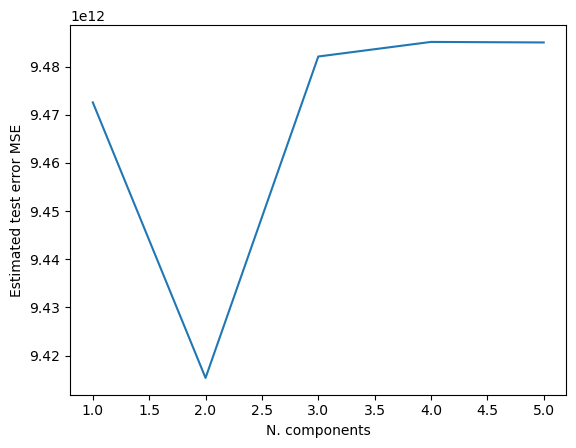

In [1737]:
# finally, let's see PLS
from sklearn.cross_decomposition  import PLSRegression

# save test error and n_components
results_pls = []
best_components_pls = {"MSE": float("inf"), "n_components": float("inf")}

# iterate over different values of lambda
for n_components in range(1, len(X_scaled.columns) + 1):
    # transform using n_components for PLS
    pls = PLSRegression(n_components = n_components)

    # Note that for PLS the syntax is a bit different from the previous models
    
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        pls.fit(X_train, y_train)
        y_pred = pls.predict(X_validation)
        y_pred = pd.Series([elem[0] for elem in y_pred])
        RSE, R2, MSE = calculate_metrics(y_validation.reset_index(drop=True), y_pred, X_subset) 
        
        # Note: in the above line there is a "reset_index". Why? 
        # Try to remove it and see what happens
        # Make some prints to understand why we need it... it's important to understand why!
        
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_pls.append([test_error_estimated, n_components])
    # check if model improved
    if test_error_estimated < best_components_pls["MSE"]:
        best_components_pls["MSE"] = test_error_estimated
        best_components_pls["n_components"] = n_components

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_pls], [elem[0] for elem in results_pls])
plt.xlabel("N. components")
plt.ylabel("Estimated test error MSE")

In [1738]:
# compare min using Lasso, Ridge and OLS
min_pls_test_error_estimated = min([elem[0] for elem in results_pls])

print(f"Using PLS, the best model has an estimated test MSE of {round(min_pls_test_error_estimated, 2)} using a number of components = {round(best_components_pls['n_components'], 2)}")

Using PLS, the best model has an estimated test MSE of 9415377623186.75 using a number of components = 2


In [1739]:
print(f"After fitting all models, the most accurate estimated test MSE is obtained by PLS with a value of {round(min_pls_test_error_estimated, 2)} using a number of components = {round(best_components_pls['n_components'], 2)}")

After fitting all models, the most accurate estimated test MSE is obtained by PLS with a value of 9415377623186.75 using a number of components = 2


As a consequence, those coefficients that we found with multiple linear regression are the coefficient of a model which is not the best one. As we have seen, PLS has better a better MSE than OLS. PLS just finds a vector.

# Objective 2

In [1740]:
#   Let's start from the dataset that we generated in the previous point. Let's print it to make sure that everything is okay.
print(merged_df)

    market_id  country  market_type  square_feet  avg_customers  \
0        XC14        0            2        11135          773.0   
1        WG25        1            0         1402          252.0   
2        UX72        1            0         1452          265.0   
3        EE84        0            2        15259          874.0   
4        RF54        1            0         2497          191.0   
..        ...      ...          ...          ...            ...   
745      ZM74        2            1         5778          356.0   
746      WW60        1            2        10923          907.0   
747      LU14        2            1         5742          397.0   
748      HY57        2            0         2495          228.0   
749      QD17        1            1         6806          516.0   

     competitor_distance  has_promotions  sales_amount  
0                    515               0  3.647356e+07  
1                    522               0  7.605641e+06  
2                  15939

The goal now is to select a market, one for each market_type, by maximizing the profit (which is measured by sales_amount). 
This work will be divided into 3 parts:
1. Building the models
2. Establishing which is the best
    - Define what does it mean "Best model"
    - Choose the best model
3. Apply the best model to suggest which is the best market

We' ve already compared some models, by finding out that the one with the best MSE is PSL.
We will, indeed, look at MSE in order to pick the model and make the final decision.

Why? As we have already said, models with lower MSE  perform better, which means that the values that we predict with our model will be close to the actual ones.\
We want to make a prediction on which market gives the most amount of saless, so we want to use an indicator that measures the accuracy and how likely our predicted data will be close to the actual data.

**Polinomial regression**

The relationship, here, is modelled as a polinomial. As a consequence our data will be up to a power of a number, instead of being all of power 1 (or 0 for B_0).
We pick k=4, as we did before. By the way, as we have seen having atleast a k=4 or 5 are useful to make predictions, so it will not cause any issue.

**Furthermore** We will look at models with target a quantitative value, as a consequence we will not apply any categorical model.

In [1741]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Number of splits for k-fold cross-validation
k = 4

# Split the data into k folds manually
kf = KFold(n_splits=k, shuffle=True, random_state=99)

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # polynomial degree 2
    poly = PolynomialFeatures(2)
    X_train_poly = poly.fit_transform(X_train) # print the columns of X_train_poly: how many columns do you expect? check the documentation to understand why there are so many columns!
    X_validation_poly = poly.fit_transform(X_validation)

    # fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # get predictions
    y_pred = model.predict(X_validation_poly)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 3734469796944.77


**Splines (GAM)**

Generalized Additive models show a way to model non-linear relationships. They do it by fitting a non linear function, which leads to more accuracy and helps on estimating the effect of every X on Y individually. However, it might not be realistic

In [1742]:
from pygam import LinearGAM, s
from functools import reduce
import numpy as np

# initialize MSE and lambda
best_lmbd_gam = {"MSE": float("inf"), "lmbd": float("inf")}

# test different values of lambda (control smoothness)
for lmbd in np.linspace(0, 10, 10):

    # Initialize an array to store MSE values for each fold
    mse_folds = []

    # run k-fold cv
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        # fit GAM: for each predictor add a smoothing spline (i.e. s(i)) and use lambda to control smoothness
        s_terms = [s(i, lam=lmbd) for i in range(len(X_train.columns))]
        gam = LinearGAM(reduce(lambda x, y: x + y, s_terms))
        gam.fit(X_train, y_train)

        # get predictions
        y_pred = gam.predict(X_validation)
        current_mse = ((y_validation - y_pred)**2).mean()
        mse_folds.append(current_mse)
    
    # Calculate the mean MSE across folds
    estimated_test_error = sum(mse_folds) / len(mse_folds)

    # check if the estimated_test_error has decreased
    if estimated_test_error < best_lmbd_gam["MSE"]:
        best_lmbd_gam["MSE"] = estimated_test_error
        best_lmbd_gam["lmbd"] = lmbd

print(f"The lowest estimated test error MSE is {round(best_lmbd_gam['MSE'], 2)}, obtained when lambda = {round(best_lmbd_gam['lmbd'], 2)}")

The lowest estimated test error MSE is 4327479113964.15, obtained when lambda = 1.11


**Decision trees**

Decision trees, as the name suggests, follow a tree structure, their peculiarity is that they are quite versatile and intuitive so they can be used if you care about these things.


In [1743]:
from sklearn.tree import DecisionTreeRegressor

# initialize MSE and alpha
best_alpha = {"MSE": float("inf"), "alpha": float("inf")}

# fit a decision tree with all data to derive the alpha values (for tree pruning)
tree = DecisionTreeRegressor(random_state=99)
tree.fit(X_scaled, y)

# get alpha values
alphas = []
for node in tree.cost_complexity_pruning_path(X_scaled, y).impurities:
    alphas.append(max(0, node))
    
# test different values of alpha (control tree complexity)
for alpha in alphas:

    # Initialize an array to store MSE values for each fold
    mse_folds = []

    # run k-fold cv
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        # fit pruned tree
        pruned_tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=99)
        pruned_tree.fit(X_train, y_train)

        # get predictions
        y_pred = pruned_tree.predict(X_validation)
        current_mse = ((y_validation - y_pred)**2).mean()
        mse_folds.append(current_mse)
    
    # Calculate the mean MSE across folds
    estimated_test_error = sum(mse_folds) / len(mse_folds)

    # check if the estimated_test_error has decreased
    if estimated_test_error < best_alpha["MSE"]:
        best_alpha["MSE"] = estimated_test_error
        best_alpha["alpha"] = alpha

print(f"The lowest estimated test error MSE is {round(best_alpha['MSE'], 2)}, obtained when alpha = {round(best_alpha['alpha'], 2)}")

# Train the final decision tree with the best alpha value and evaluate it on the test data
final_tree = DecisionTreeRegressor(ccp_alpha=best_alpha['alpha'], random_state=99)
final_tree.fit(X_scaled, y)


The lowest estimated test error MSE is 3445091388373.09, obtained when alpha = 181252112221.15


DecisionTreeRegressor(ccp_alpha=181252112221.14706, random_state=99)

In this case, the MSE is not even that bad, but alpha is too high(alpha = 181252112221.15).\
Alpha is a parameter that controlles bias-variance trade-off and is useful to prevent overfitting. A too high alpha is not a good indicator because makes the subtree too small and might lead to overfit.\
We want to avoid such thing if we make a prediction, so I prefer to not choose it.


**Random forests**

Random forest are an ensemple method of decision trees. They are helpful because they reduce correlation by picking a random sample each time.
They simplify, so they might be useful to handle complex data.

In [1744]:
from sklearn.ensemble import RandomForestRegressor

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # create a Random Forest 
    model = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=99)

    # fit the model to the training data
    model.fit(X_train, y_train)

    # make predictions 
    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 3404426198841.45


Look at the next three blocks at the end.

In [1745]:
X11=pd.DataFrame ({
   'square_feet': ['1850'],
    'avg_customers': ['190'],
    'competitor_distance': ['4500'],
    'market_type': ['0'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X11_scaled=scaler.transform(X11)
#print(X1_scaled)
y11_pred = model.predict(X11_scaled)
print(y11_pred)

X21=pd.DataFrame ({
   'square_feet': ['2100'],
    'avg_customers': ['225'],
    'competitor_distance': ['1850'],
    'market_type': ['0'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X21_scaled=scaler.transform(X21)
#print(X2_scaled)
y21_pred = model.predict(X21_scaled)
print(y21_pred)

X31=pd.DataFrame ({
   'square_feet': ['1920'],
    'avg_customers': ['220'],
    'competitor_distance': ['1450'],
    'market_type': ['0'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X31_scaled=scaler.transform(X31)
#print(X3_scaled)
y31_pred = model.predict(X31_scaled)
print(y31_pred)

print("The highest is the first one")

[7090261.4902]
[6795061.7881]
[6642669.3283]
The highest is the first one


c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1746]:
X12=pd.DataFrame ({
   'square_feet': ['5880'],
    'avg_customers': ['420'],
    'competitor_distance': ['580'],
    'market_type': ['1'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X12_scaled=scaler.transform(X12)
#print(X1_scaled)
y12_pred = model.predict(X12_scaled)
print(y12_pred)

X22=pd.DataFrame ({
   'square_feet': ['5120'],
    'avg_customers': ['390'],
    'competitor_distance': ['2560'],
    'market_type': ['1'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X22_scaled=scaler.transform(X22)
#print(X2_scaled)
y22_pred = model.predict(X22_scaled)
print(y22_pred)

X32=pd.DataFrame ({
   'square_feet': ['4970'],
    'avg_customers': ['410'],
    'competitor_distance': ['3520'],
    'market_type': ['1'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X32_scaled=scaler.transform(X32)
#print(X3_scaled)
y32_pred = model.predict(X32_scaled)
print(y32_pred)
print("The highest is the first one")

[14997217.85230001]
[13240075.5991]
[13467889.44790001]
The highest is the first one


c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1747]:
X13=pd.DataFrame ({
   'square_feet': ['10560'],
    'avg_customers': ['860'],
    'competitor_distance': ['8940'],
    'market_type': ['2'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X13_scaled=scaler.transform(X13)
#print(X1_scaled)
y13_pred = model.predict(X13_scaled)
print(y1_pred)

X23=pd.DataFrame ({
   'square_feet': ['12570'],
    'avg_customers': ['880'],
    'competitor_distance': ['7580'],
    'market_type': ['2'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X23_scaled=scaler.transform(X23)
#print(X2_scaled)
y23_pred = model.predict(X23_scaled)
print(y23_pred)

X33=pd.DataFrame ({
   'square_feet': ['11980'],
    'avg_customers': ['790'],
    'competitor_distance': ['11560'],
    'market_type': ['2'],
   'has_promotions': ['0']
})
scaler = StandardScaler()
scaler.fit(X_subset)
X33_scaled=scaler.transform(X33)
#print(X3_scaled)
y33_pred = model.predict(X3_scaled)
print(y33_pred)
print("The highest is the second one")

[34454812.05320001]
[36803788.7305]
[34544905.6371]
The highest is the second one


c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\AlexD\anaconda1\envs\Project\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Gradient Boosting**
Gradient boosting are an ensemble method, too. Rather than picking randomly as random forests, they correct each time.

In [1748]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # create a Random Forest 
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=99)

    # fit the model to the training data
    model.fit(X_train, y_train)

    # make predictions 
    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 3620444648549.66


**Support vector regression**

Support vector regression uses Support vector machines, in order to perform a regression. It uses hyperplane that best fit the data.\
Again, we will use SVR with quantitative target, not categorical.

In [1749]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# find best parameters
parameters = {
    'C': np.linspace(1, 100, 10).tolist(), 
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'] + np.linspace(0.01, 1, 10).tolist(), 
}

# Create the SVM model
svm = SVR()

# Create the GridSearchCV
grid_search = GridSearchCV(svm, parameters, cv=5)  

# Fit the GridSearchCV to the training data
grid_search.fit(X_scaled, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_

print(best_params)

{'C': 100.0, 'gamma': 0.45, 'kernel': 'rbf'}


In [1750]:
# Now we can run k-fold using the best parameters

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # fit model
    model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"]) 
    model.fit(X_train, y_train)

    # get predictions
    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 111177724457956.4


**Neural Network (Regression)**

We are using Neural networks that borrow their concept from human brain where each neuron takes an input and computes it, in order  to generate an output.\
We will need to use pytorch.

In [1751]:
import torch

In [1752]:
X = X[best_features]
y = y.to_numpy().reshape(-1, 1)  # reshape y, we need a numpy array

# standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [1753]:
torch.manual_seed(99)

# convert the numpy arrays to pytorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

In [1754]:
input_size = X_train.shape[1]
hidden_sizes = [100, 5]
output_size = 1
learning_rate = 1e-3
num_epochs = 100
batch_size = 8

In [1755]:
import torch.nn as nn
import torch.optim as optim

# define NN architecture
def create_model(input_size, hidden_sizes, output_size):
    layers = []
    for i in range(len(hidden_sizes)):
        if i == 0:
            layers.append(nn.Linear(input_size, hidden_sizes[i]))
        else:
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(hidden_sizes[-1], output_size))
    return nn.Sequential(*layers)

# call the model
model = create_model(input_size, hidden_sizes, output_size)

# define the loss function: MSE
criterion = nn.MSELoss()

# optimizer: in pytorch "gradient descent" is called SDG (stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# for each epoch, do forward and backward
for epoch in range(num_epochs):
    for start in range(0, X_train_tensor.size(0), batch_size):
        # get batch
        X_batch = X_train_tensor[start: start+batch_size]
        y_batch = y_train_tensor[start: start+batch_size]

        # forward pass
        outputs = model.forward(X_batch)
        loss = criterion(outputs, y_batch)

        # backward pass and optimization (gradient descent)
        optimizer.zero_grad()  # reset gradient otherwise pytorch will use values from the previous iteration
        loss.backward() 
        optimizer.step()

    # print the loss at every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')

# evaluate the model on the validation set
with torch.no_grad():
    model.eval()
    y_pred = model.forward(X_val_tensor)
    valid_loss = criterion(y_pred, y_val_tensor)
    print(f'The estimated test MSE is: {valid_loss.item()}')

Epoch [10/100], Training Loss: 3463083945250258944.0000
Epoch [20/100], Training Loss: 172620971918753792.0000
Epoch [30/100], Training Loss: 8794763729829888.0000
Epoch [40/100], Training Loss: 552476608561152.0000
Epoch [50/100], Training Loss: 118769821155328.0000
Epoch [60/100], Training Loss: 91765658877952.0000
Epoch [70/100], Training Loss: 89205212446720.0000
Epoch [80/100], Training Loss: 88806275416064.0000
Epoch [90/100], Training Loss: 88725904162816.0000
Epoch [100/100], Training Loss: 88708447469568.0000
The estimated test MSE is: 90526158159872.0


After having done all the work, we can say that the model with the lower MSE is: Random forests.
As a consequence, we will use this model in order to make prediction on which market will provide more sales.

To not make the code heavier, I actually performed the prevision Ex-Post under the Building of the model, you can go back to see the results and the procedure.
We can say, by our model that the markets that, given the data, maximize the sales are:
- OPTION SPAIN for MINI 
- OPTION SPAIN FOR SUPER
- OPTION FRANCE FOR HYPER